## Machine Learning Project

Wine Quality


In [ ]:

import os  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Loading the dataset 
wq_df=pd.read_csv("D:/Integrify/Dataset/ML_Reg_1/winequalityN.csv")
wq_df.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
wq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
#Summary 
wq_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
type_counts = wq_df['type'].value_counts()
type_counts


white    4898
red      1599
Name: type, dtype: int64

In [ ]:
# Handle categorical variable (type) - Label Encoding
wq_df['type'] = wq_df['type'].map({'red': 0, 'white': 1})

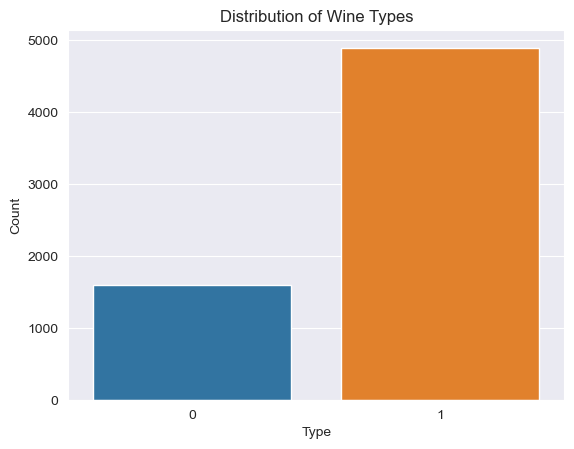

In [ ]:
sns.countplot(data=wq_df, x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Wine Types')
plt.show()

In [ ]:
# Checking Missing values
wq_df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

The results show that there are missing values ,only few missing values are seen.Here we will replace with the mean value

In [ ]:
# Replace null values with mean
wq_df=wq_df.fillna(wq_df.mean())

In [ ]:
wq_df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

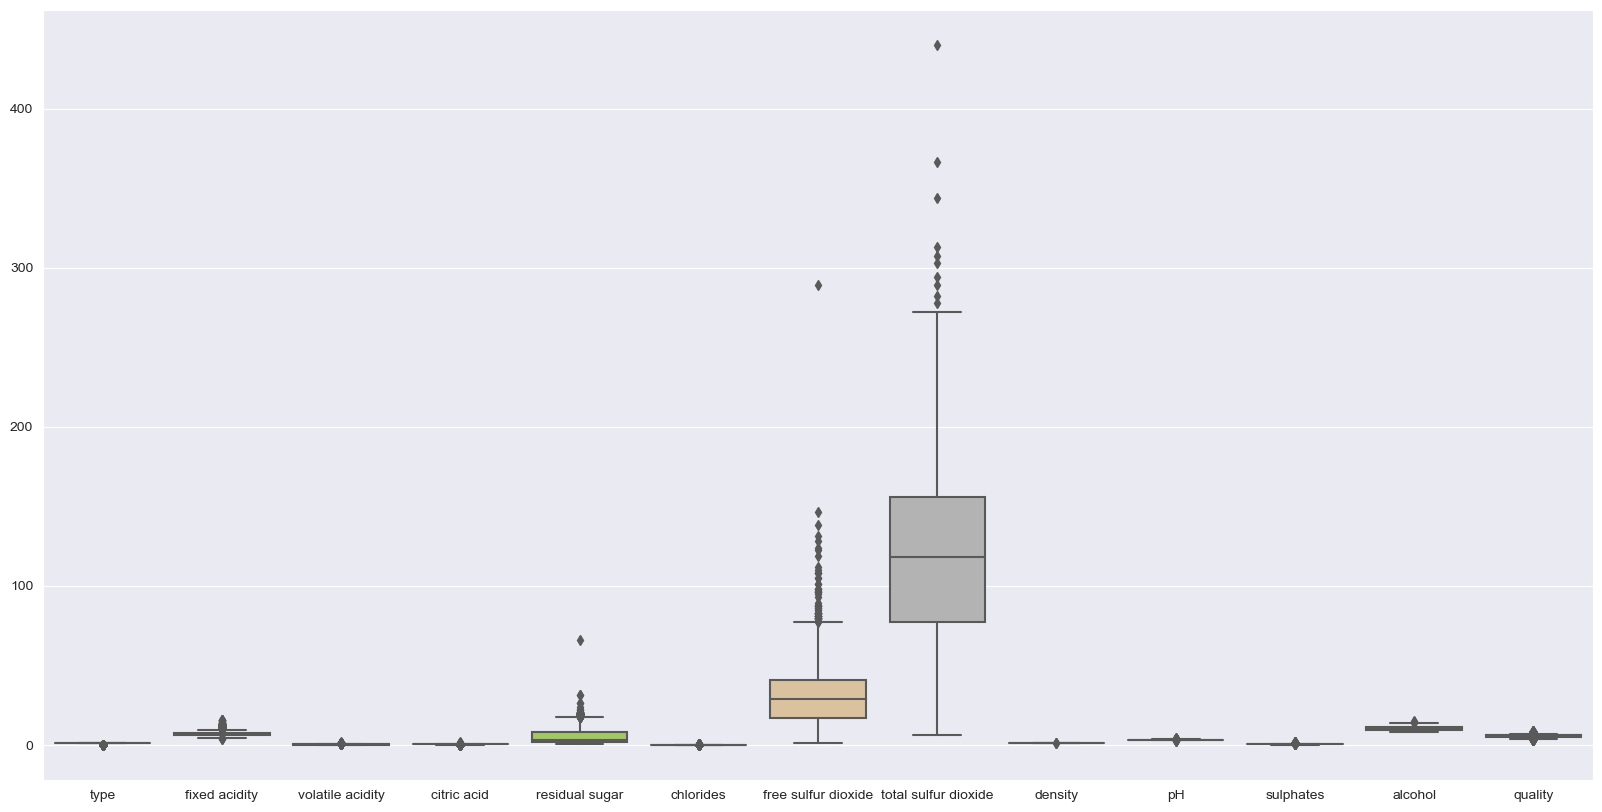

In [ ]:
#Outliers -- Boxplot
plt.figure(figsize = (20, 10))
sns.boxplot(data = wq_df, palette = "Set2")
plt.show()

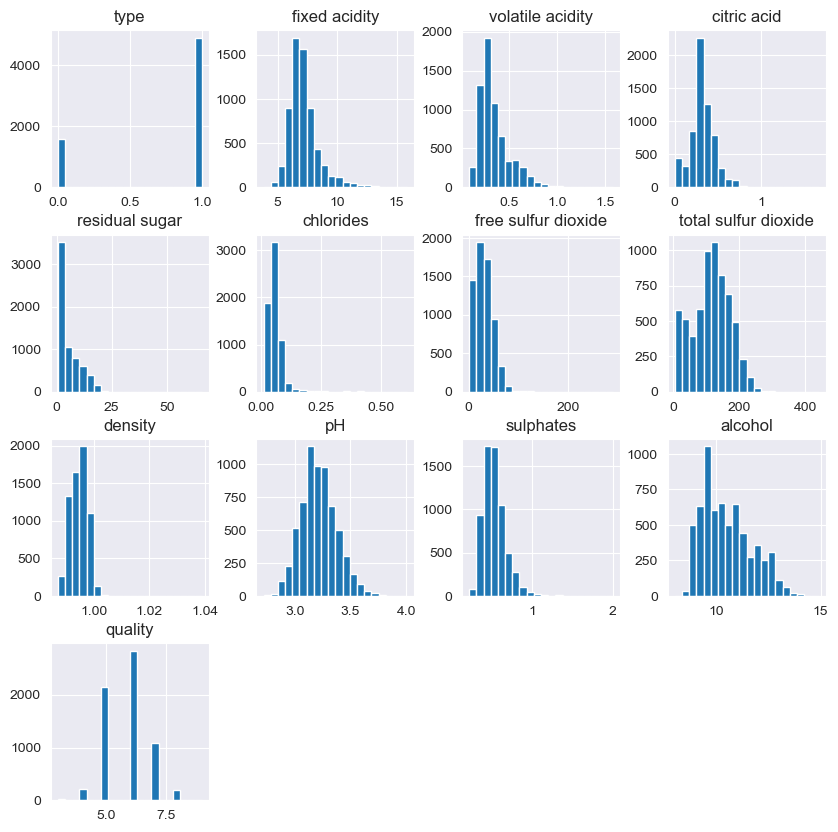

In [ ]:
# Visualizations
wq_df.hist(bins=20,figsize=(10,10))
plt.show()


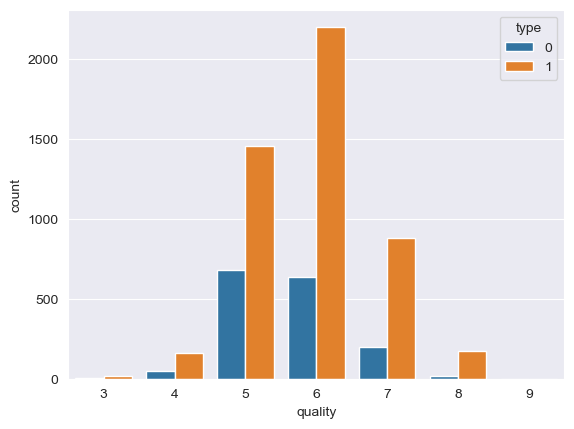

In [ ]:
sns.set_style(style="darkgrid") 
sns.countplot(x = "quality",hue="type", data = wq_df) # Show the counts of observations in each categorical bin using bars.
plt.show()

The quality of the wine most preferred has quality 6

<AxesSubplot: xlabel='type', ylabel='count'>

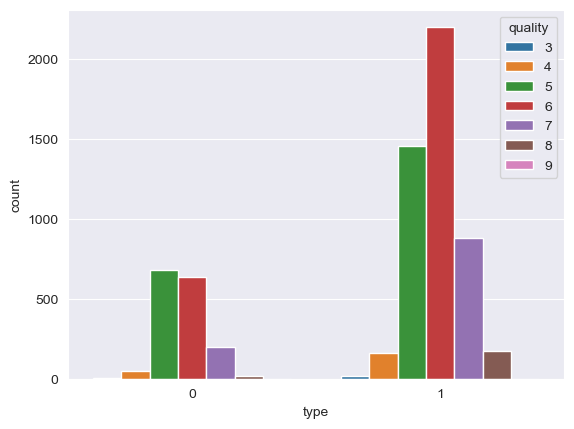

In [ ]:
sns.countplot(x="type", hue="quality", data=wq_df)

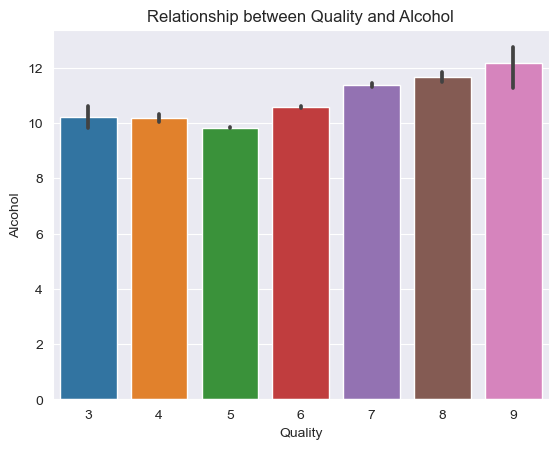

In [ ]:
sns.barplot(x='quality', y='alcohol', data=wq_df)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Relationship between Quality and Alcohol')
plt.show()

We could say that when the quality of alcohol increases ,there is an increase in the alcohol content

In [ ]:
# # Check unique values in each column
unique_values = wq_df.nunique()
print(unique_values)

type                      2
fixed acidity           107
volatile acidity        188
citric acid              90
residual sugar          317
chlorides               215
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      109
sulphates               112
alcohol                 111
quality                   7
dtype: int64


In [ ]:
# Correlation matrix
# Correlation matrix
corr_matrix = wq_df.corr()
corr_matrix


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486913,-0.652606,0.187073,0.348982,-0.512596,0.471644,0.700357,-0.390645,-0.328514,-0.486662,0.032970,0.119323
fixed acidity,-0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,-0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,-0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,-0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


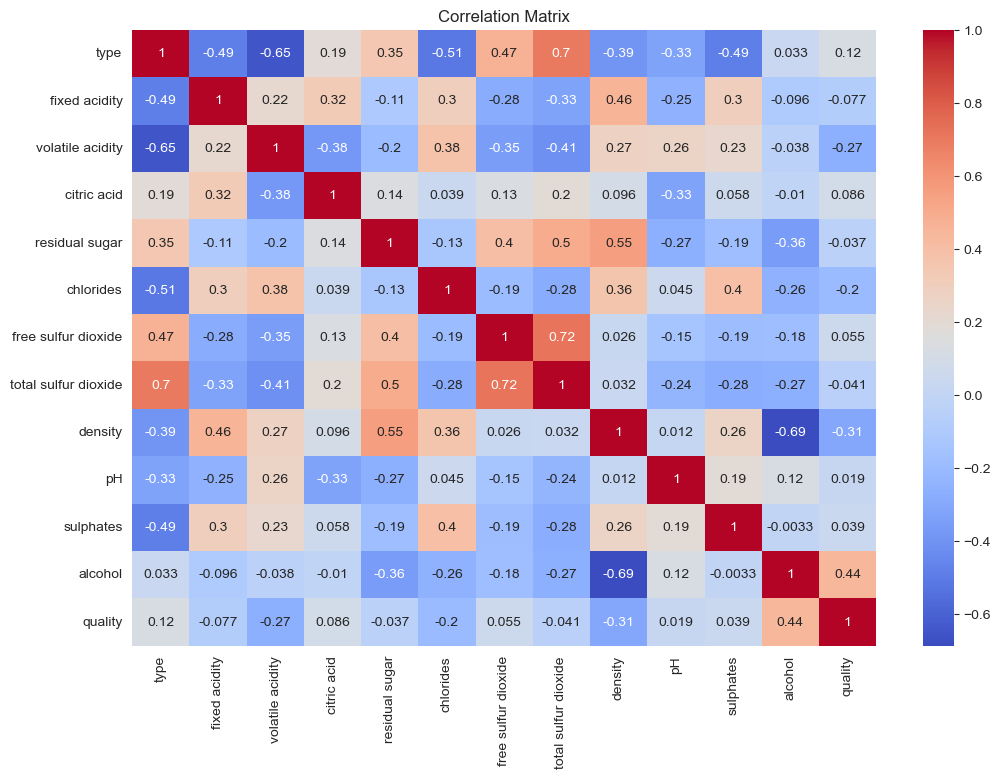

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

total sulphur dioxide and free sulphur dioxide is highly correlated

Alchohol, sulphates, Volatile  acidity seems to have the highest correlation.

ph and residual sugar practically having very less or no relationship with the target variable.

features that is highly correlated,and thus reduce the number of feature also delete them.The reason is why because relationship among them is equal they could equally impact the model accuracy.


In [ ]:
for a in range(len(wq_df.corr().columns)):
    for b in range(a):
        if abs(wq_df.corr().iloc[a,b]) >0.7:
            name = wq_df.corr().columns[a]
            print(name)

total sulfur dioxide
total sulfur dioxide


In [ ]:
# Drop the feature with correlation value greater than 0.7
wq_df_new=wq_df.drop('total sulfur dioxide',axis=1)

In [ ]:
wq_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 6497 non-null   int64  
 1   fixed acidity        6497 non-null   float64
 2   volatile acidity     6497 non-null   float64
 3   citric acid          6497 non-null   float64
 4   residual sugar       6497 non-null   float64
 5   chlorides            6497 non-null   float64
 6   free sulfur dioxide  6497 non-null   float64
 7   density              6497 non-null   float64
 8   pH                   6497 non-null   float64
 9   sulphates            6497 non-null   float64
 10  alcohol              6497 non-null   float64
 11  quality              6497 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 609.2 KB


In [ ]:
wq_df_new

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5


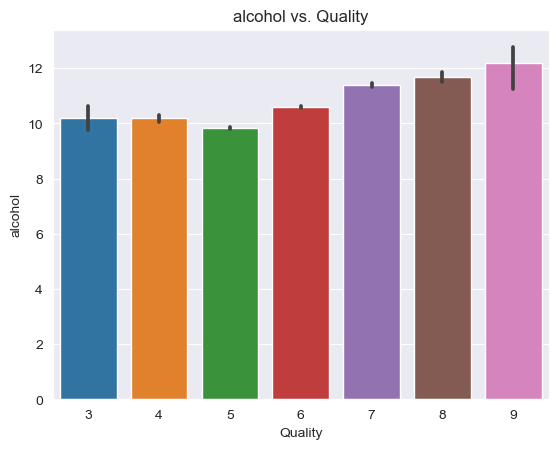

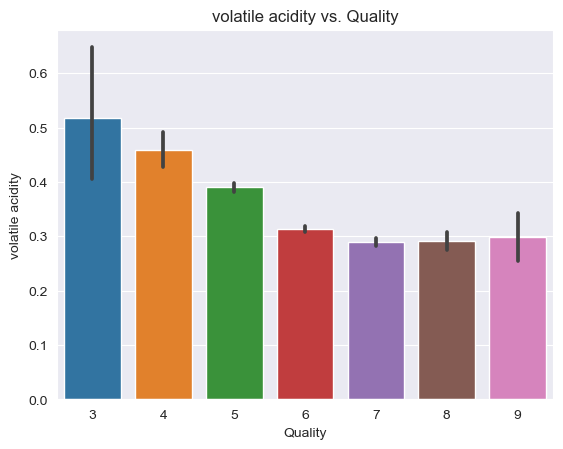

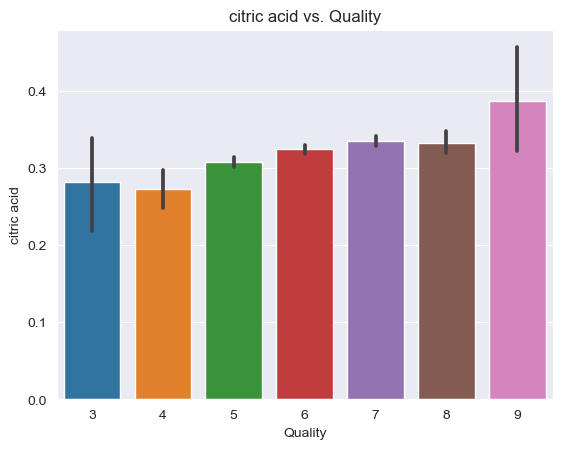

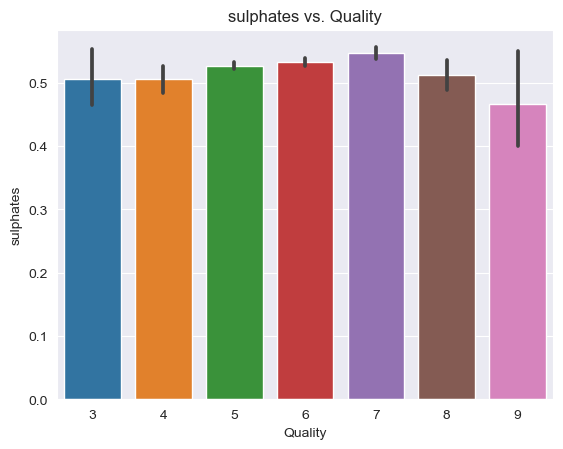

In [ ]:
features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']
for feature in features:
    sns.barplot(x='quality', y=feature, data=wq_df)
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.title(f'{feature} vs. Quality')
    plt.show()


In [ ]:
# target Variable
wq_df_new.quality.value_counts()

6    2758
5    2046
7    1064
4     213
8     188
3      25
9       5
Name: quality, dtype: int64

In [ ]:
# view percentage of frequency distribution of values

wq_df_new['quality'].value_counts()/len(wq_df)

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

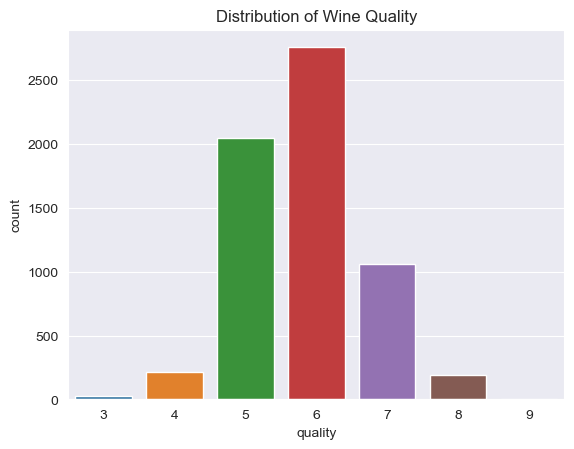

In [ ]:
# Plot the distribution of the target variable (quality)
sns.countplot(x='quality', data=wq_df)
plt.title('Distribution of Wine Quality')
plt.show()

Our goal is to predict the quality of the wine, the quality range from 1 t0 9 .So its not necessary to balance the data. Balancing is mainly done when there is a significant class imbalance.Here, the distribution of quality of ratings may not be perfectly balanced.

In [ ]:
#1.  Split the data into features (X) and target variable (y)
X = wq_df_new.drop('quality', axis=1)
y = wq_df_new[['quality']]

#2. Data Scaling
scale=StandardScaler()
x_scaled=a.fit_transform(X)

#3. # Fit PCA
pca = PCA()
X_pca = pca.fit_transform(x_scaled) # transformed data

# 4. Fit into random forest classifier
rfc = RandomForestRegressor()
rfc.fit(X_pca,y)

# 5. Feature importance scores and store them in a dataframe
feature_importances = rfc.feature_importances_
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 6. Rank the features and sort it in  desecnding order
feature_ranking = feature_ranking.sort_values(by='Importance', ascending=False)
 
print(feature_ranking)





                Feature  Importance
1         fixed acidity    0.136988
3           citric acid    0.118420
0                  type    0.114550
2      volatile acidity    0.113790
4        residual sugar    0.092199
5             chlorides    0.089999
8                    pH    0.082497
10              alcohol    0.069790
7               density    0.061536
9             sulphates    0.060145
6   free sulfur dioxide    0.060087


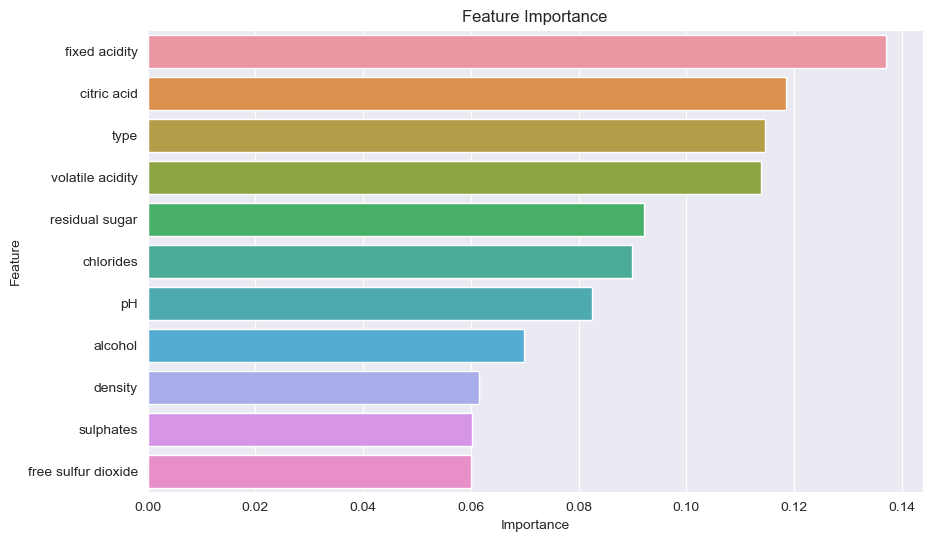

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_ranking)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
3103,1,7.0,0.25,0.45,2.3,0.045,40.0,0.99064,3.16,0.48,11.9
1419,1,7.6,0.14,0.74,1.6,0.040,27.0,0.99160,3.07,0.40,10.8
4761,1,6.2,0.15,0.27,11.0,0.035,46.0,0.99602,3.12,0.38,9.1
4690,1,6.7,0.16,0.32,12.5,0.035,18.0,0.99666,2.88,0.36,9.0
4032,1,6.8,0.27,0.22,17.8,0.034,16.0,0.99890,3.07,0.53,9.2
...,...,...,...,...,...,...,...,...,...,...,...
889,1,6.5,0.30,0.32,2.0,0.044,34.0,0.99185,3.37,0.68,11.0
2850,1,6.7,0.24,0.29,14.9,0.053,55.0,0.99839,3.03,0.52,9.0
4917,0,7.9,0.32,0.51,1.8,0.341,17.0,0.99690,3.04,1.08,9.2
5198,0,7.5,0.53,0.06,2.6,0.086,20.0,0.99650,3.38,0.59,10.7


Models

- Linear Regression
- Random Forest Regression
- XGBOOST Regression
- Decision Tree Regression

In [ ]:
# Create a linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

In [ ]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

# Print the evaluation metrics
print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)
print("R^2 Score:", lr_r2)
print("RMSE Score",lr_rmse)

Mean Squared Error: 0.4707285971644955
Mean Absolute Error: 0.5452097874959932
R^2 Score: 0.3414535718565498
RMSE Score 0.6860966383567956


In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

# Print the evaluation metrics
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)
print("RMSE Score",rf_rmse)

Mean Squared Error: 0.43994860624059084
Mean Absolute Error: 0.5246333763211666
R^2 Score: 0.38451459088816364
RMSE Score 0.6632862174360258


In [ ]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
# Fit the model to the training data
dt_regressor.fit(X_train, y_train)
# Make predictions on the test data
dt_y_pred = dt_regressor.predict(X_test)

In [ ]:
# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)

# Print the evaluation metrics
print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)
print("R^2 Score:", dt_r2)
print("RMSE Score",dt_rmse)

Mean Squared Error: 0.4735075717535659
Mean Absolute Error: 0.5392264398757936
R^2 Score: 0.33756580340450015
RMSE Score 0.6881188645528953


In [ ]:
# XGBOOST Regressor
# Create an XGBoost regressor
xgb_reg = XGBRegressor()

# Train the model on the training data
xgb_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
# Evaluate the model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)

# Print the evaluation metrics
print("Mean Squared Error:", xgb_mse)
print("Mean Absolute Error:", xgb_mae)
print("R^2 Score:", xgb_r2)
print("RMSE Score",xgb_rmse)

Mean Squared Error: 0.34691993211482497
Mean Absolute Error: 0.43278849289967464
R^2 Score: 0.5146611369647676
RMSE Score 0.5889990934753847


In [ ]:
# Compare the model accuracy
accuracy_df = pd.DataFrame(columns=['Model','MSE' ,'MAE','R2','RMSE'])
accuracy_df = accuracy_df.append({'Model': 'Linear Regression','MSE':lr_mse,'MAE':lr_mae,'R2':lr_r2,'RMSE': lr_rmse,}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'Random Forest','MSE':rf_mse,'MAE':rf_mae,'R2':rf_r2,'RMSE': rf_rmse,}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'Decision Tree','MSE':dt_mse,'MAE':dt_mae,'R2':rf_r2,'RMSE': dt_rmse,}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'XGBOOST','MSE':xgb_mse,'MAE':xgb_mae,'R2':xgb_r2,'RMSE': xgb_rmse,}, ignore_index=True)


In [ ]:
accuracy_df

,Model,MSE,MAE,R2,RMSE
0,Linear Regression,0.470729,0.545210,0.341454,0.686097
1,Random Forest,0.439949,0.524633,0.384515,0.663286
2,Decision Tree,0.473508,0.539226,0.384515,0.688119
3,XGBOOST,0.346920,0.432788,0.514661,0.588999


Based on the MSE value XGBOOST perfomed best among the given models.

Hypertuning using GridSearch CV

In [ ]:
#1. Linear Regression

lr_gs = LinearRegression()
lr_param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Fit the grid search model on the training data
lr_grid_search.fit(X_train, y_train)
best_model = lr_grid_search.best_estimator_
best_params = lr_grid_search.best_params_

# Make predictions on the test data using the best model
y_pred_lrg = best_model.predict(X_test)

# Evaluate the best model on the testing set
lr_eval_mse = mean_squared_error(y_test, y_pred_lrg)
lr_eval_mae = mean_absolute_error(y_test, y_pred_lrg)
lr_eval_r2 = r2_score(y_test, y_pred)
lr_eval_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", lr_eval_mae)
print("Mean Squared Error:",  lr_eval_mse)
print("R-squared:", lr_eval_r2)
print("Root Mean Squared Error:", lr_eval_rmse)



Best Hyperparameters: {'fit_intercept': True, 'normalize': False}
Mean Absolute Error: 0.5452097874959932
Mean Squared Error: 0.4707285971644955
R-squared: 0.3414535718565498
Root Mean Squared Error: 0.6860966383567956


In [ ]:
# Random Forest
rf_gs = RandomForestRegressor()
# Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}
# Create the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf_gs, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = rf_grid_search.best_estimator_
best_params = rf_grid_search.best_params_

# Make predictions on the test data using the best model
y_pred_rf = best_model.predict(X_test)

# Evaluate the best model on the testing set
print("Best Hyperparameters:", best_params)
rf_eval_mse = mean_squared_error(y_test, y_pred_rf)
rf_eval_mae = mean_absolute_error(y_test, y_pred_rf)
rf_eval_r2 = r2_score(y_test, y_pred)
rf_eval_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", rf_eval_mae)
print("Mean Squared Error:",  rf_eval_mse)
print("R-squared:", rf_eval_r2)
print("Root Mean Squared Error:", rf_eval_rmse)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.5s
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.8s
[CV] END ...................max_depth=None, n_estimators=200; total time=   8.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=   8.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   8.8s
[CV] END ...................max_depth=None, n_estimators=200; total time=   9.3s
[CV] END ...................max_depth=None, n_estimators=200; total time=   7.1s
[CV] END ...................max_depth=None, n_estimators=300; total time=  11.2s
[CV] END ...................max_depth=None, n_est

In [ ]:
# Evaluate the best model on the testing set
print("Best Hyperparameters:", best_params)
rf_eval_mse = mean_squared_error(y_test, y_pred_rf)
rf_eval_mae = mean_absolute_error(y_test, y_pred_rf)
rf_eval_r2 = r2_score(y_test, y_pred)
rf_eval_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", rf_eval_mae)
print("Mean Squared Error:",  rf_eval_mse)
print("R-squared:", rf_eval_r2)
print("Root Mean Squared Error:", rf_eval_rmse)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Mean Absolute Error: 0.40396410256410265
Mean Squared Error: 0.3150440512820513
R-squared: 0.33756580340450015
Root Mean Squared Error: 0.5612878506453274


In [ ]:
# Decision Tree Regressor
dt_gs = DecisionTreeRegressor()
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create the GridSearchCV object
dt_grid_search = GridSearchCV(estimator=dt_gs, param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=5)
dt_grid_search.fit(X_train, y_train)
best_model = dt_grid_search.best_estimator_
best_params = rf_grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the testing set
dt_eval_mse = mean_squared_error(y_test, y_pred)
dt_eval_mae = mean_absolute_error(y_test, y_pred)
dt_eval_r2 = r2_score(y_test, y_pred)
dt_eval_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", dt_eval_mse)
print("Mean Absolute Error:", dt_eval_mae)
print("R^2 Score:", dt_eval_r2)
print("Root Mean Squared Error:", dt_eval_rmse)


Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Mean Squared Error: 0.4735075717535659
Mean Absolute Error: 0.5392264398757936
R^2 Score: 0.33756580340450015
Root Mean Squared Error: 0.5612878506453274


In [ ]:
# Create the XGBoost regressor
xgb_gs = XGBRegressor()

# Define the hyperparameter grid
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create the GridSearchCV object
xgb_grid_search = GridSearchCV(estimator=xgb_gs, param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search model on the training data
xgb_grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = xgb_grid_search.best_estimator_
best_params = rf_grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the testing set
xgb_eval_mse = mean_squared_error(y_test, y_pred)
xgb_eval_mae = mean_absolute_error(y_test, y_pred)
xgb_eval_r2 = r2_score(y_test, y_pred)
xgb_eval_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Print the evaluation metrics
print("Mean Squared Error:", xgb_eval_mse)
print("Mean Absolute Error:", xgb_eval_mae)
print("R^2 Score:", xgb_eval_r2)
print("Root Mean Squared Error:", xgb_eval_rmse)

Mean Squared Error: 0.3227251052103319
Mean Absolute Error: 0.40651305968944845
R^2 Score: 0.5485095518124745
Root Mean Squared Error: 0.5612878506453274


In [ ]:
# Compare the model accuracy after hypertuned
accuracy_df1 = pd.DataFrame(columns=['Model','MSE' ,'MAE','R2','RMSE'])
accuracy_df1 = accuracy_df1.append({'Model': 'Linear Regression','MSE':lr_mse,'MAE':lr_mae,'R2':lr_r2,'RMSE': lr_rmse,}, ignore_index=True)
accuracy_df1 = accuracy_df1.append({'Model': 'Random Forest','MSE':rf_mse,'MAE':rf_mae,'R2':rf_r2,'RMSE': rf_rmse,}, ignore_index=True)
accuracy_df1 = accuracy_df1.append({'Model': 'Decision Tree','MSE':dt_mse,'MAE':dt_mae,'R2':rf_r2,'RMSE': dt_rmse,}, ignore_index=True)
accuracy_df1 = accuracy_df1.append({'Model': 'XGBOOST','MSE':xgb_mse,'MAE':xgb_mae,'R2':xgb_r2,'RMSE': xgb_rmse,}, ignore_index=True)


In [ ]:
accuracy_df1

,Model,MSE,MAE,R2,RMSE
0,Linear Regression,0.470729,0.545210,0.341454,0.686097
1,Random Forest,0.439949,0.524633,0.384515,0.663286
2,Decision Tree,0.473508,0.539226,0.384515,0.688119
3,XGBOOST,0.346920,0.432788,0.514661,0.588999


The XGBoost model performed the best among the four models.

 --- lowest mean squared error (MSE) of 0.346920

 ---- lowest mean absolute error (MAE) of 0.432788

 ----highest R^2 score of 0.514661

 
  XGBoost model outperformed the other models in terms of predictive accuracy and overall performance.

Predict the quality of the wine using XGBOOST

In [ ]:
input_val =np.array ([[0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5]])
y_pred = best_model.predict(input_val)
print(y_pred)



[5.1141443]
